# CS-483 Project02 
## Team: swag
## Team members: Sravani, Adam, Wei

### Question 1
#### Solution
Step 1: To help marketing team, to understand the behaviour of customers based on there income and spending (plot).<br>
Step 2: Scatter plot to understand the data set repersentation (Income Vs Spend) plot.<br>
Step 3: Elbow Method to find an optimal K<br>
Step 4: Implementation of Kmeans with the optimal k and visualize the results.

### Step 1:

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

data = pd.read_csv(r"C:\Users\srava\OneDrive\Desktop\KMeans Dataset.csv",sep=',' ,index_col=False)
print (data.head())
print ("\n")
print("data information")
print ("\n")
print (data.describe())

   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


data information


           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000


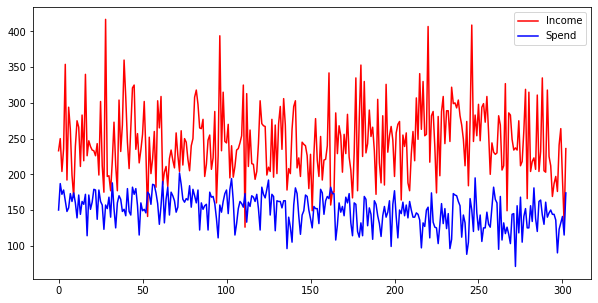

In [3]:
# Plot the income and spend of money 
# To help the marketing team to understand give visual of the Income and spending to give better 
#offers 
plt.figure(figsize=[10,5])
plt.plot(data['INCOME'], color='red', label='Income')
plt.plot(data['SPEND'], color='blue', label='Spend')
plt.legend()
plt.show()

### Step 2:

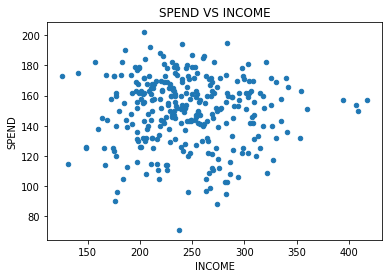

In [4]:
data.plot(kind = 'scatter', x = 'INCOME', y = 'SPEND')
plt.title('SPEND VS INCOME')
plt.show()

### Step 3:

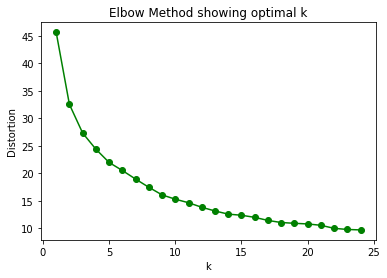

In [5]:
x= pd.array(data['INCOME'])
y= pd.array(data['SPEND'])
plt.plot()
X = np.array(list(zip(x, y ))).reshape(len(x), 2)  #makes a 2-d array
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing optimal k')
plt.show()

### Step 4: 

[0 1 2] (303, 2)


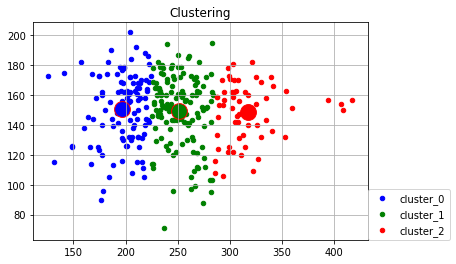

In [6]:
k=3 # from above we have consider k to be 3
colors = ['b','g','r']
km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=30, random_state=0)
clusters=np.array(range(0,k))
print(clusters,X.shape)
y_km=km.fit_predict(X)
labels = km.labels_
cents = km.cluster_centers_
for i in range(k):
    index = np.nonzero(labels==i)[0]
    x0 = X[index,0]
    x1 = X[index,1]
    y_i = y_km[index]
    plt.scatter(x0,x1,s=20,c=colors[i],marker='o',label='cluster_'+str(i))
    plt.scatter(cents[i,0],cents[i,1],s=250,c=colors[i],marker='o',edgecolors='red')
plt.legend(loc=[1,0])
plt.grid()
plt.title('Clustering')
plt.show()

### Question 02
Solution:
Make a half-moon-shaped dataset.<br>
Make a comparison between clustering algorithms of KMeans, Hierarchical clustering, and DBSCAN.

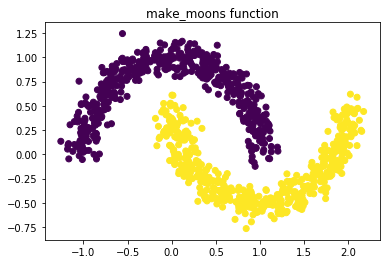

In [4]:
from sklearn.datasets import make_moons

x0,y0=make_moons(n_samples=1000,noise=0.085,random_state=1)
#print(x1.shape,y1.shape)
plt.title('make_moons function')  
plt.scatter(x0[:,0],x0[:,1],marker='o',c=y0*3)  
plt.show()
#print(type(x1))

### KMeans Clustering

(1000,) (1000,)


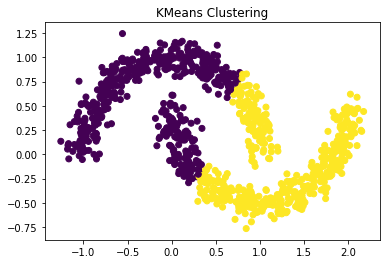

In [5]:
cl1= KMeans(n_clusters=2, init='random', max_iter=300, random_state=0)
y1=cl1.fit_predict(x0)
print(y0.shape,y1.shape)
plt.title('KMeans Clustering')  
plt.scatter(x0[:,0],x0[:,1],marker='o',c=y1*3)  
plt.show()

### Hierarchical Clustering

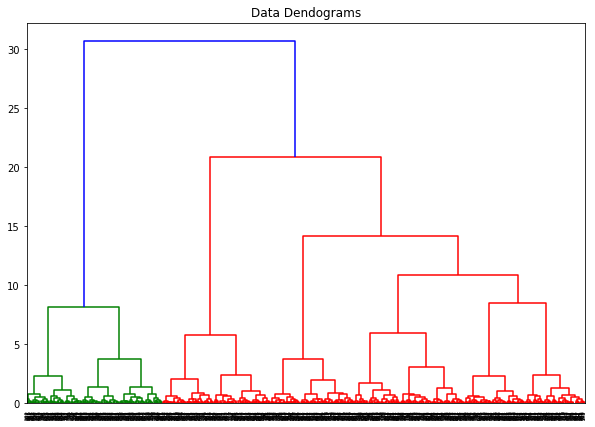

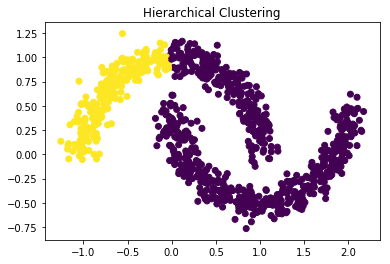

In [6]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Data Dendograms")
dend = shc.dendrogram(shc.linkage(x0, method='ward'))
plt.show()
#print(y0.shape,y2.shape)

cl2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y2=cl2.fit_predict(x0)
plt.title('Hierarchical Clustering')  
plt.scatter(x0[:,0],x0[:,1],marker='o',c=y2*3)  
plt.show()

### DBSCAN

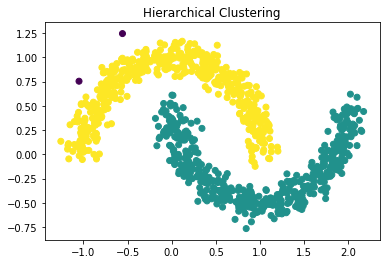

In [7]:
from sklearn.cluster import DBSCAN
cl3 = DBSCAN(eps=0.18, min_samples=4)
y3= cl3.fit_predict(x0)
plt.title('Hierarchical Clustering')  
plt.scatter(x0[:,0],x0[:,1],marker='o',c=y3*3)  
plt.show()